/tmp/ipykernel_6291/1658394015.py:36: RuntimeWarning: invalid value encountered in true_divide
  return (np.sin(x-beta(x))/np.sin(x+beta(x)))**2
/tmp/ipykernel_6291/1658394015.py:42: RuntimeWarning: invalid value encountered in true_divide
  return (np.tan(x-beta(x))/np.tan(x+beta(x)))**2


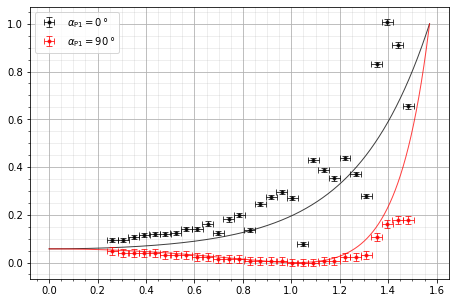

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import pandas as pd
from scipy.optimize import curve_fit

input = 'V23.txt'

xo = np.loadtxt(input, float, usecols=0, skiprows=5, delimiter=',')
U0t = np.loadtxt(input, float, usecols=1, skiprows=5, delimiter=',')
U90t = np.loadtxt(input, float, usecols=2, skiprows=5, delimiter=',')
phi = np.loadtxt(input, float, usecols=3, skiprows=5, delimiter=',')

Uzero = 0.02
U0ref = 2.305 + Uzero
U90ref = 1.209 + Uzero
U0 = U0t + Uzero
U90 = U90t + Uzero
rho0sqrd = U0 / U0ref
rho90sqrd = U90 / U90ref
Uerr = 0.02
rho0sqrderr = ((Uerr / U0ref)**2 + (Uerr * U0 / U0ref**2)**2)**(1/2)
rho90sqrderr = ((Uerr / U90ref)**2 + (Uerr * U90 / U90ref**2)**2)**(1/2)

x = (90 - ( xo / 2 ))/180*np.pi
y0 = (y0o + 0.02)/(2.305+0.02)
y90 = (y90o + 0.02)/(1.029+0.02)
xerr = 1.3/180*np.pi
y0err = 0
y90err = 0

def beta(x):
    return np.arcsin(np.sin(x)/1.63)

def f1(x):
    return (np.sin(x-beta(x))/np.sin(x+beta(x)))**2

def f1err(a):
    return xerr*(1 - 0.613496932515337*np.cos(a)/np.sqrt(1 - 0.376378486205729*np.sin(a)**2))*np.cos(a - np.arcsin(0.613496932515337*np.sin(a)))/np.sin(a + np.arcsin(0.613496932515337*np.sin(a))) - (1 + 0.613496932515337*np.cos(a)/np.sqrt(1 - 0.376378486205729*np.sin(a)**2))*np.sin(a - np.arcsin(0.613496932515337*np.sin(a)))*np.cos(a + np.arcsin(0.613496932515337*np.sin(a)))/np.sin(a + np.arcsin(0.613496932515337*np.sin(a)))**2

def f2(x):
    return (np.tan(x-beta(x))/np.tan(x+beta(x)))**2

def f2err(a):
    return xerr*abs(1 - 0.613496932515337*np.cos(a)/np.sqrt(1 - 0.376378486205729*np.sin(a)**2))*(np.tan(a - np.arcsin(0.613496932515337*np.sin(a)))**2 + 1)/np.tan(a + np.arcsin(0.613496932515337*np.sin(a))) - (1 + 0.613496932515337*np.cos(a)/np.sqrt(1 - 0.376378486205729*np.sin(a)**2))*(np.tan(a + np.arcsin(0.613496932515337*np.sin(a)))**2 + 1)*np.tan(a - np.arcsin(0.613496932515337*np.sin(a)))/np.tan(a + np.arcsin(0.613496932515337*np.sin(a)))**2

fig, ax = plt.subplots(figsize=(7.5,5))
xplot_1 = np.linspace(0, np.pi/2, 10000)

ax.set_xlabel(r'')
ax.set_ylabel(r'')
ax.grid()
ax.grid(which='minor', color='#999999', alpha=0.2, linestyle='-')
ax.minorticks_on()
ax.plot(xplot_1, f1(xplot_1), color = 'black', alpha = 0.75, linewidth = 1, label = '')
#plt.fill_between(xplot_1, f1(xplot_1)-f1err(xplot_1), f1(xplot_1)+f1err(xplot_1), color = 'black', alpha = 0.25)
ax.plot(xplot_1, f2(xplot_1), color = 'red', alpha = 0.75, linewidth = 1, label = '')
#plt.fill_between(xplot_1, f2(xplot_1)-f2err(xplot_1), f2(xplot_1)+f2err(xplot_1), color = [200/255,60/255,40/255], alpha = 0.25)
ax.errorbar(x, rho0sqrd, xerr = xerr, yerr = rho0sqrderr, fmt = '.', color = 'black', alpha = 0.75, linewidth=1, ecolor="black", capsize=3, label = r'$\alpha_\mathrm{P1}=0\,\degree$')
ax.errorbar(x, rho90sqrd, xerr = xerr, yerr = rho90sqrderr, fmt = '.', color = 'red', alpha = 0.75, linewidth=1, ecolor="red", capsize=3, label = r'$\alpha_\mathrm{P1}=90\,\degree$')
ax.legend()
plt.savefig('', facecolor = 'white', bbox_inches='tight')
plt.show()